In [50]:
import ccxt
import pandas as pd

In [51]:
import numpy as np

In [52]:
print(ccxt.exchanges)

['ace', 'alpaca', 'ascendex', 'bequant', 'bigone', 'binance', 'binancecoinm', 'binanceus', 'binanceusdm', 'bit2c', 'bitbank', 'bitbay', 'bitbns', 'bitcoincom', 'bitfinex', 'bitfinex2', 'bitflyer', 'bitforex', 'bitget', 'bithumb', 'bitmart', 'bitmex', 'bitopro', 'bitpanda', 'bitrue', 'bitso', 'bitstamp', 'bitstamp1', 'bittrex', 'bitvavo', 'bkex', 'bl3p', 'blockchaincom', 'btcalpha', 'btcbox', 'btcex', 'btcmarkets', 'btctradeua', 'btcturk', 'buda', 'bybit', 'cex', 'coinbase', 'coinbaseprime', 'coinbasepro', 'coincheck', 'coinex', 'coinfalcon', 'coinmate', 'coinone', 'coinspot', 'cryptocom', 'currencycom', 'delta', 'deribit', 'digifinex', 'exmo', 'flowbtc', 'fmfwio', 'gate', 'gateio', 'gemini', 'hitbtc', 'hitbtc3', 'hollaex', 'huobi', 'huobijp', 'huobipro', 'idex', 'independentreserve', 'indodax', 'itbit', 'kraken', 'krakenfutures', 'kucoin', 'kucoinfutures', 'kuna', 'latoken', 'lbank', 'lbank2', 'luno', 'lykke', 'mercado', 'mexc', 'mexc3', 'ndax', 'novadax', 'oceanex', 'okcoin', 'okex', 

In [53]:
exchangeName = 'binancecoinm'
exchange_class = getattr(ccxt, exchangeName)
print(exchange_class)

<class 'ccxt.binancecoinm.binancecoinm'>


In [54]:
# ccxt.binancecoinm <=> getattr(ccxt, "ccxt.binancecoinm")
print(ccxt.binancecoinm)

<class 'ccxt.binancecoinm.binancecoinm'>


In [55]:
# instantiation of my exchange
exchange = exchange_class({
	'apiKey': '296015e94a672f83bfb4076908741a255cd5c9f192da047d12eb63cff4c73a7e',
	'secret': '4ecd9157f7b1a8486742374e9627d4ae4cfca3b997d1532ef447dc915fad62f5',
})


In [56]:
hasattr(exchange, 'set_sandbox_mode')
exchange.set_sandbox_mode(True)

# # check exchange structure

In [57]:
print(exchange.urls)

{'logo': 'https://user-images.githubusercontent.com/1294454/117738721-668c8d80-b205-11eb-8c49-3fad84c4a07f.jpg', 'test': {'dapiPublic': 'https://testnet.binancefuture.com/dapi/v1', 'dapiPrivate': 'https://testnet.binancefuture.com/dapi/v1', 'dapiPrivateV2': 'https://testnet.binancefuture.com/dapi/v2', 'fapiPublic': 'https://testnet.binancefuture.com/fapi/v1', 'fapiPrivate': 'https://testnet.binancefuture.com/fapi/v1', 'fapiPrivateV2': 'https://testnet.binancefuture.com/fapi/v2', 'public': 'https://testnet.binance.vision/api/v3', 'private': 'https://testnet.binance.vision/api/v3', 'v1': 'https://testnet.binance.vision/api/v1'}, 'api': {'dapiPublic': 'https://testnet.binancefuture.com/dapi/v1', 'dapiPrivate': 'https://testnet.binancefuture.com/dapi/v1', 'dapiPrivateV2': 'https://testnet.binancefuture.com/dapi/v2', 'fapiPublic': 'https://testnet.binancefuture.com/fapi/v1', 'fapiPrivate': 'https://testnet.binancefuture.com/fapi/v1', 'fapiPrivateV2': 'https://testnet.binancefuture.com/fapi/

In [58]:
print(exchange.has)

{'publicAPI': True, 'privateAPI': True, 'CORS': None, 'spot': False, 'margin': False, 'swap': True, 'future': True, 'option': None, 'addMargin': True, 'cancelAllOrders': True, 'cancelOrder': True, 'cancelOrders': None, 'createDepositAddress': False, 'createLimitOrder': True, 'createMarketOrder': True, 'createOrder': True, 'createPostOnlyOrder': True, 'createReduceOnlyOrder': True, 'createStopOrder': True, 'createStopLimitOrder': True, 'createStopMarketOrder': True, 'editOrder': True, 'fetchAccounts': None, 'fetchBalance': True, 'fetchBidsAsks': True, 'fetchBorrowInterest': True, 'fetchBorrowRate': True, 'fetchBorrowRateHistory': True, 'fetchBorrowRatesPerSymbol': False, 'fetchBorrowRates': False, 'fetchCanceledOrders': False, 'fetchClosedOrder': False, 'fetchClosedOrders': 'emulated', 'fetchCurrencies': True, 'fetchDeposit': False, 'fetchDepositAddress': True, 'fetchDepositAddresses': False, 'fetchDepositAddressesByNetwork': False, 'fetchDeposits': True, 'fetchFundingFee': None, 'fetch

### time conversion

In [59]:
time = exchange.milliseconds()
print(time)
date_time = exchange.iso8601(exchange.milliseconds())
print(date_time)


1678782048688
2023-03-14T08:20:48.688Z


```
{1591258320000,      // 开盘时间
    "9640.7",           // 开盘价
    "9642.4",           // 最高价
    "9640.6",           // 最低价
    "9642.0",           // 收盘价(当前K线未结束的即为最新价)
    "206",              // 成交量/code
}
```

In [60]:
df = pd.DataFrame(exchange.fetchOHLCV('BTCUSD_PERP', timeframe='1d'))

In [61]:
columns = [n for n in df.columns]
print(columns)

[0, 1, 2, 3, 4, 5]


In [62]:
df.columns = ['time', 'open', 'high', 'low', 'close', 'volume']

In [63]:
# modify the columns
df.set_index('time', inplace=True)

In [64]:
# index modification: timestamp -> DateTimeIndex
# df.index = pd.to_datetime(df.index)
df.index = pd.to_datetime(df.index, unit='ms')

In [65]:
df.head

<bound method NDFrame.head of                open     high      low    close     volume
time                                                     
2022-08-27  22000.0  22000.0  18000.0  21799.0   815710.0
2022-08-28  21799.0  21800.0  18500.0  19680.0   530184.0
2022-08-29  19680.0  21799.0  18591.0  20287.6   886789.0
2022-08-30  20286.8  21740.0  18599.0  21499.0  1177202.0
2022-08-31  21499.0  21500.0  18599.0  21348.0   600826.0
...             ...      ...      ...      ...        ...
2023-03-10  21270.5  22139.9  19500.0  22000.0  1257195.0
2023-03-11  22000.0  22500.0  20101.0  22299.9   692517.0
2023-03-12  22299.9  23600.0  21000.0  23600.0   671133.0
2023-03-13  23600.0  24999.0  21100.0  24500.0  3081969.0
2023-03-14  24500.0  24990.0  22800.0  24330.0   474444.0

[200 rows x 5 columns]>

In [66]:
df.describe()

,open,high,low,close,volume
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,20155.379000,21292.092000,18842.787000,20218.271000,1.132763e+06
std,2562.228724,2847.022682,2296.125792,2569.804334,5.400816e+05
min,16200.600000,16976.000000,14600.000000,16508.200000,2.292920e+05
25%,17378.475000,18552.500000,16804.250000,17640.200000,7.181985e+05
50%,20103.900000,21075.500000,18630.500000,20104.350000,1.021358e+06
75%,22324.700000,23945.325000,20375.000000,22324.500000,1.392925e+06
max,25925.900000,27100.000000,23229.900000,25925.900000,3.136177e+06


# compute the Fractal series

In [67]:
arr1 = np.array([True, False, False])
arr2 = np.array([True, False,True])
arr3 = np.array([False, False, False])
# arr3 = np.logical_and([arr1, arr2, arr3]) the expression is wrong, because only the first two elements was compared
arr_Modified = np.logical_and.reduce([arr1,arr2,arr3])
print(arr_Modified)

[False False False]


In [68]:
periods = [-2, -1, 1, 2]
# get 4 series[Bool]
highs = [ df['high'] > df['high'].shift(p) for p in periods ]
len(highs)
type(highs[0])

pandas.core.series.Series

In [69]:
# 4 Series[bool] => bears: Series[bool]
bears = np.logical_and.reduce(highs)
print(bears)

[False False False False False  True False False  True False False False
 False False False False  True False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
  True False False False False False False False False  True False False
  True False False False False False False False False False False  True
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
  True False False False False False False False  True False False False
 False False False False False  True False False  True False False False
 False False False False False  True False False  T

In [70]:
from typing import Tuple


def loc_frac(df: pd.DataFrame, period: int = 2) -> Tuple[pd.Series, pd.Series]:
    """Indicate bearish and bullish fractal patterns using shifted Series.

    :param df: OHLC data
    :param period: number of lower (or higher) points on each side of a high (or low)
    :return: tuple of boolean Series (bearish, bullish) where True marks a fractal pattern
    """

    # default [-2, -1, 1, 2]
    periods = [p for p in range(-period, period + 1) if p != 0]

    highs = [df['high'] > df['high'].shift(p) for p in periods]
    bears = pd.Series(np.logical_and.reduce(highs), index=df.index)

    lows = [df['low'] < df['low'].shift(p) for p in periods]
    bulls = pd.Series(np.logical_and.reduce(lows), index=df.index)

    return bears, bulls


In [71]:
bears, bulls = loc_frac(df, period=3)

In [72]:
print(bears, type(bears)) 

time
2022-08-27    False
2022-08-28    False
2022-08-29    False
2022-08-30    False
2022-08-31    False
              ...  
2023-03-10    False
2023-03-11    False
2023-03-12    False
2023-03-13    False
2023-03-14    False
Length: 200, dtype: bool <class 'pandas.core.series.Series'>


### get the actual row from the bears: Series[bool], bull: Series[bool]

In [73]:
# use the bears, bulls as filters
bear_fractals = df.loc[bears]
bull_fractals = df.loc[bulls]


## visiualization

In [74]:
import matplotlib.pyplot as plt
import mplfinance as mpf


In [76]:
# reconstruct the bears_fractals
def bear_fractal_signal(bears: pd.Series, df: pd.DataFrame) -> pd.DataFrame:
    signal = [] 
    for date_index in bears.index:
        if bears.loc[date_index]:
            signal.append(df.loc[date_index]['high'])
        else:
            signal.append(np.nan)
    return signal
      
         

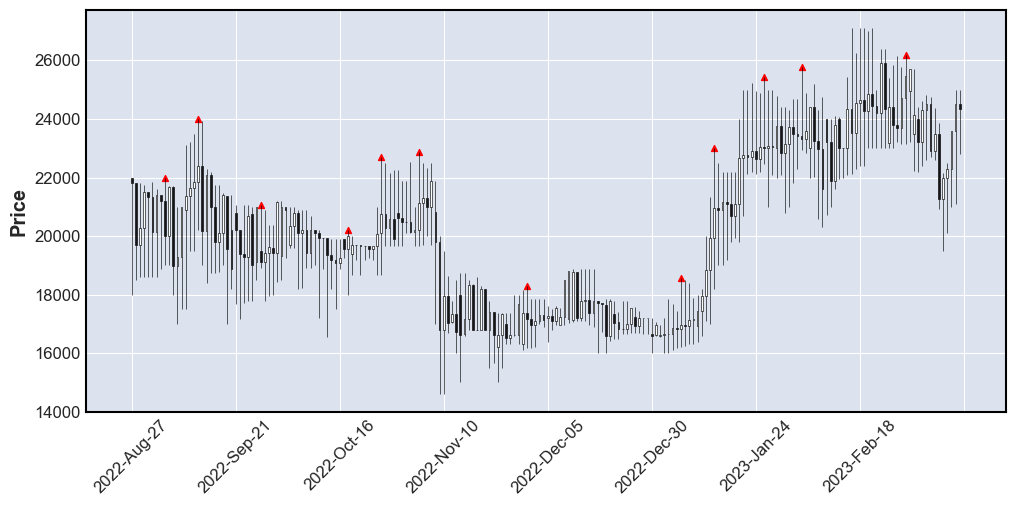

In [77]:
# create the K-line chart
# TODO: chart annotations
highlight_rows = bear_fractal_signal(bears, df)
# annotation
ap = mpf.make_addplot(highlight_rows, type='scatter', marker='^',color='red')
mpf.plot(df, type='candle', figratio=(20,9), addplot=ap)
